## Dataset source: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 1. Exploratory data analysis

In [2]:
df = pd.read_csv('wine.csv')
df['quality'] = df['quality'].replace({'bad': 0, 'good': 1})
print(df.shape)
df

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [3]:
missing_values = df.isna().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Basic statistics

In [4]:
df_features = df.drop('quality',axis=1)
df_features.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [5]:
quality = df['quality']
quality.describe()

count    1599.000000
mean        0.534709
std         0.498950
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: quality, dtype: float64

### Balance check - the dataset is balanced, with a slight majority of "good" quality wine

In [17]:
quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

### Unique values for the attributes 

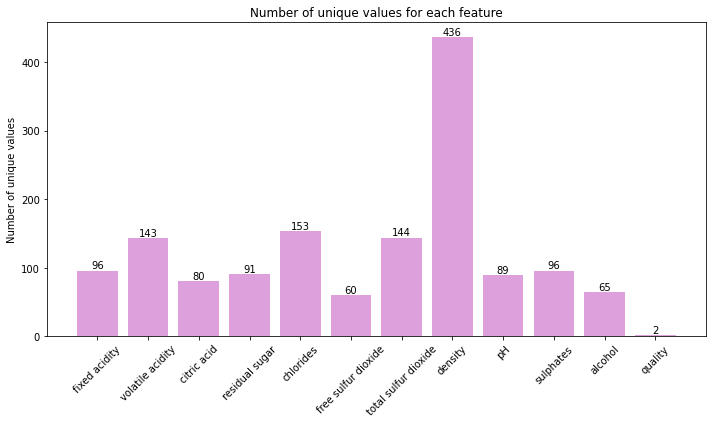

In [7]:
unique_counts = df.nunique()
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_counts.index, unique_counts.values, color='plum')

for bar in bars: #adding captions to bars
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
    
plt.title('Number of unique values for each feature')
plt.ylabel('Number of unique values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation between features

It can be noted that the classification of wine quality is strongly dependent on alcohol level and volatile acidity.

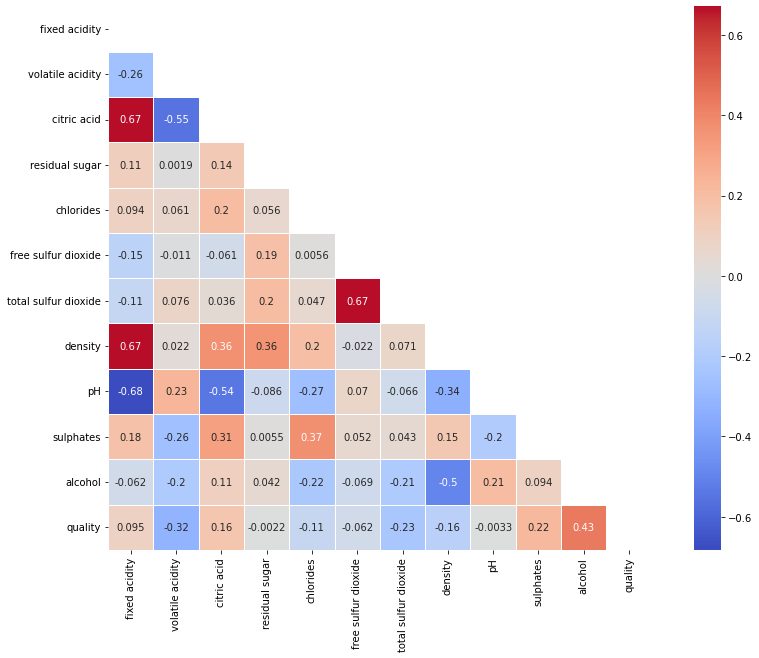

In [19]:
plt.figure(figsize=(15,10))
corr = df.corr()
heat_map = sns.heatmap( corr,
    center=0, 
    cmap="coolwarm", 
    square=True,
    annot=True,
    mask=np.triu(df.corr()),linewidth=1, linecolor='white' )

### Boxplot for each feature

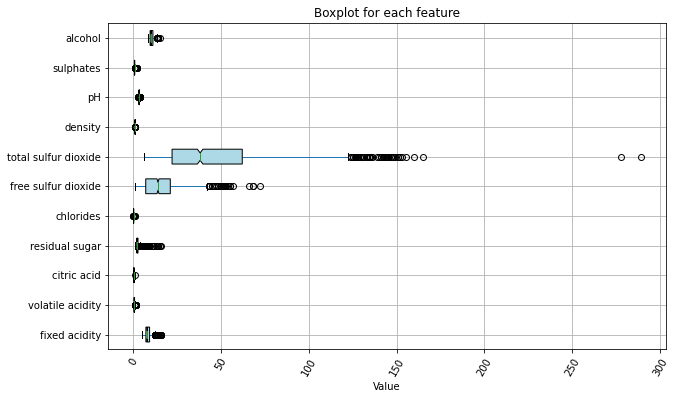

In [21]:
df_features.boxplot(figsize=(10,6),showfliers=True,patch_artist = True,
                notch ='True', vert = 0, boxprops = dict(facecolor='lightblue', color='black'))
plt.xticks(rotation=60)  
plt.title('Boxplot for each feature')
plt.xlabel('Value')
plt.grid(True)
plt.show()

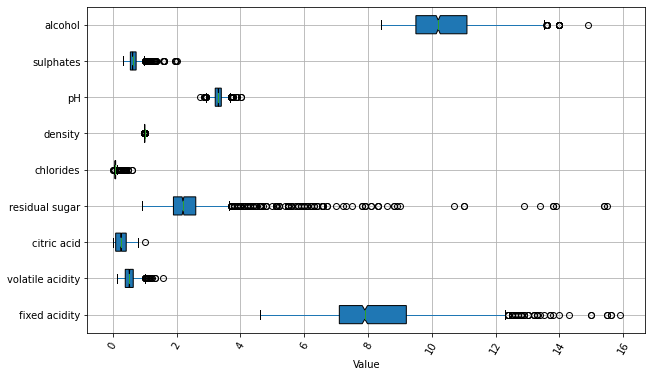

In [12]:
df_features2 = df_features.drop(['total sulfur dioxide', 'free sulfur dioxide'], axis=1)
df_features2.boxplot(figsize=(10,6),showfliers=True,patch_artist = True,
                notch ='True', vert = 0, boxprops=dict(color='black'))
plt.xticks(rotation=60)
plt.xlabel('Value')
plt.grid(True)
plt.show()

### Distribution of values for each characteristic 

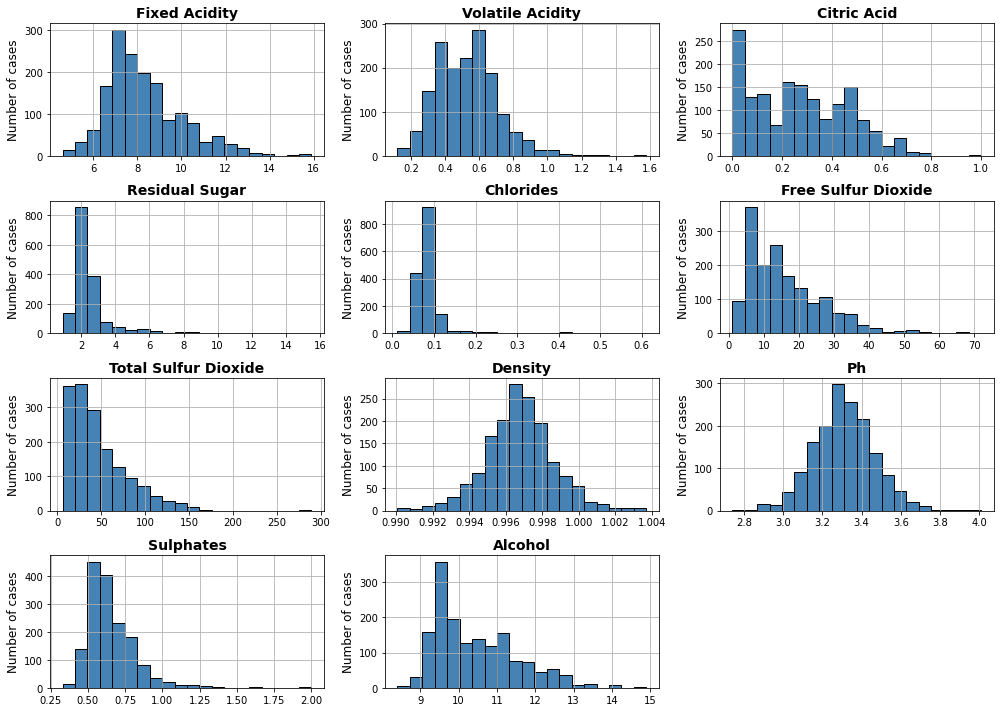

In [81]:
index = 1
plt.figure(figsize=(14,27))
for i in range(1, len(df.columns)):
    plt.subplot(11, 3, index)
    plt.hist(x=df[df.columns[i-1]], color='steelblue', bins=20, edgecolor='black')
    plt.title(df.columns[i-1].title(), fontsize=14, weight='bold')
    plt.ylabel(ylabel='Number of cases', fontsize=12)
    plt.grid()
    index += 1
    plt.tight_layout()
    
plt.show()

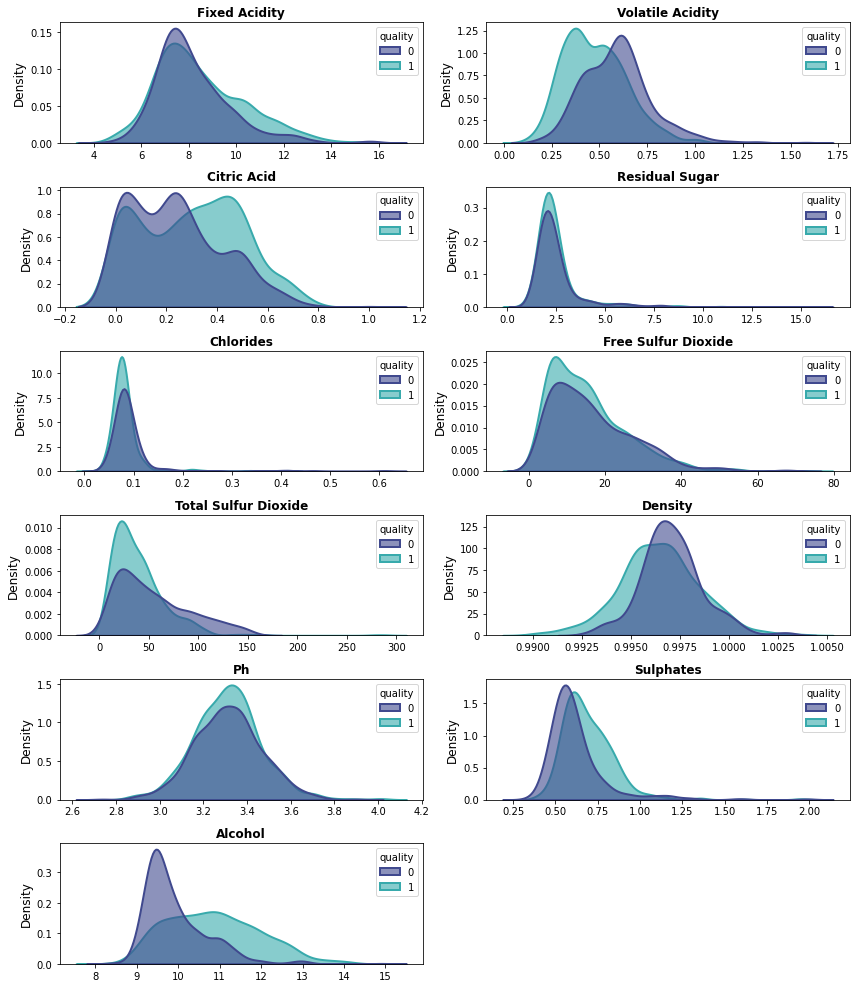

In [82]:
index = 1
plt.figure(figsize=(12,25))
for i in range(1, len(df.columns)):
    plt.subplot(11, 2, index)
    sns.kdeplot(data=df, x=df.columns[i-1], 
                shade=True, hue='quality', linewidth=2, palette='mako', alpha=0.6)
    plt.title(df.columns[i-1].title(), fontsize=12, weight='bold')
    plt.xlabel("")
    plt.ylabel(ylabel='Density', fontsize=12)
    index += 1
    plt.tight_layout()
    
plt.show()

### Comparison of the boxplots for wine good and bad for each feature.

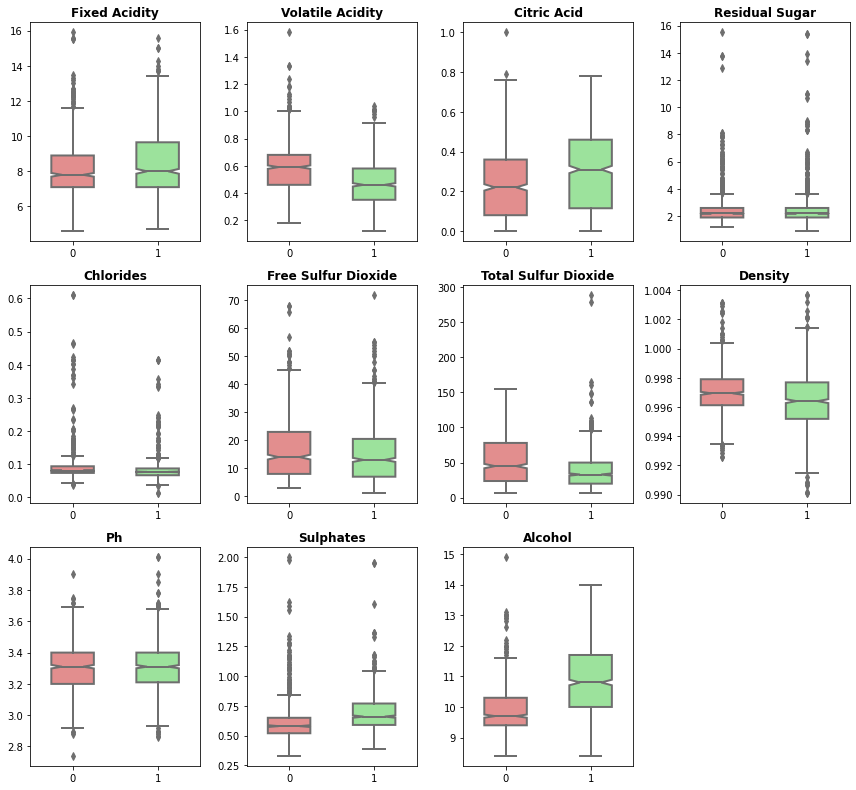

In [83]:
index = 1
plt.figure(figsize=(12,40))
for i in range(1, len(df.columns)):
    plt.subplot(11, 4, index)
    sns.boxplot(data=df, x='quality' ,y=df.columns[i-1], 
                linewidth=2, palette=["lightcoral", "lightgreen"],width=0.5,notch=True)
    plt.title(df.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel('', fontsize=12, weight='bold')
    plt.xlabel('')
    index += 1
    plt.tight_layout()
    
plt.show()

# 2. Neural network with Keras - wine binary classification problem 

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)  
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)

model = Sequential()
model.add(Dense(100, input_shape=(11,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2) 

def test_model(model, x_test, y_test, history, X_train, y_train):
    plt.figure(figsize=(12, 5)) 
    plt.subplot(1, 2, 1)  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2) 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')


    plt.tight_layout()  
    plt.show()

    loss, accuracy = model.evaluate(x_test, y_test)
    print('Accuracy on test set: %.2f' % (accuracy * 100))
    
    loss, accuracy = model.evaluate(X_train, y_train)
    print('Accuracy on train set: %.2f' % (accuracy * 100))

Epoch 1/100
103/103 [==============================] - 3s 8ms/step - loss: 0.6745 - accuracy: 0.6051 - val_loss: 0.7269 - val_accuracy: 0.6055
Epoch 2/100
103/103 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.6158 - val_loss: 0.6666 - val_accuracy: 0.6523
Epoch 3/100
103/103 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.6295 - val_loss: 0.7256 - val_accuracy: 0.6133
Epoch 4/100
103/103 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6129 - val_loss: 0.6585 - val_accuracy: 0.6641
Epoch 5/100
103/103 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6393 - val_loss: 0.6426 - val_accuracy: 0.6445
Epoch 6/100
103/103 [==============================] - 0s 4ms/step - loss: 0.6099 - accuracy: 0.6774 - val_loss: 0.6179 - val_accuracy: 0.6367
Epoch 7/100
103/103 [==============================] - 0s 5ms/step - loss: 0.6026 - accuracy: 0.6784 - val_loss: 0.6307 - val_accuracy: 0.6250

Epoch 58/100
103/103 [==============================] - 0s 4ms/step - loss: 0.5197 - accuracy: 0.7370 - val_loss: 0.5805 - val_accuracy: 0.6914
Epoch 59/100
103/103 [==============================] - 0s 5ms/step - loss: 0.5134 - accuracy: 0.7351 - val_loss: 0.6977 - val_accuracy: 0.6523
Epoch 60/100
103/103 [==============================] - 1s 6ms/step - loss: 0.5008 - accuracy: 0.7468 - val_loss: 0.6030 - val_accuracy: 0.6797
Epoch 61/100
103/103 [==============================] - 0s 4ms/step - loss: 0.5017 - accuracy: 0.7537 - val_loss: 0.6641 - val_accuracy: 0.6523
Epoch 62/100
103/103 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.7576 - val_loss: 0.6214 - val_accuracy: 0.6875
Epoch 63/100
103/103 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7586 - val_loss: 0.5875 - val_accuracy: 0.7070
Epoch 64/100
103/103 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.7429 - val_loss: 0.5791 - val_accuracy:

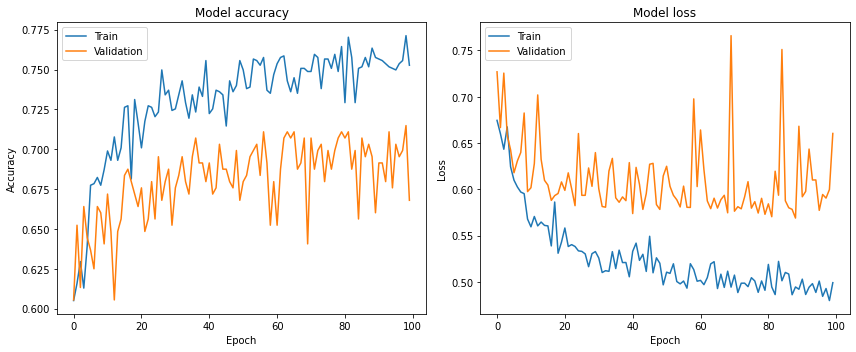

10/10 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.7469
Accuracy on test set: 74.69
40/40 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7295
Accuracy on train set: 72.95


In [10]:
test_model(model, X_test, y_test, history, X_train, y_train)

# <span style="color: #1BB5B7;font-size: 25pt">a) Investigating the impact of the number of layers on the results </span>

In [88]:
Hiden_layers =[8,4,3,2,1,0]
Acc_test_layers =[]
Acc_train_layers = []

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30, stratify=y)

XTraining, XValidation, YTraining, YValidation = train_test_split(X_train, y_train,test_size=0.2, 
                                                                  random_state=12, stratify=y_train)


XTraining=tf.convert_to_tensor(XTraining, dtype=tf.float32) 
XValidation=tf.convert_to_tensor(XValidation, dtype=tf.float32) 
YTraining=tf.convert_to_tensor(YTraining, dtype=tf.int32)
YValidation=tf.convert_to_tensor(YValidation, dtype=tf.int32)

## <span style="color: #8B0000;">Number of hidden layers = 8</span>

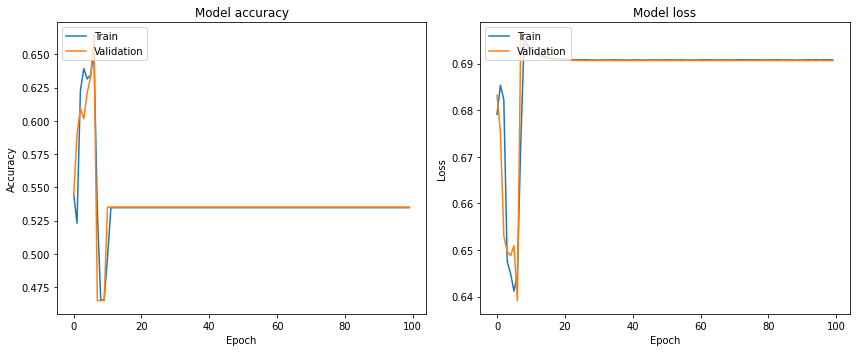

10/10 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5344
Accuracy on test set: 53.44
40/40 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5348
Accuracy on train set: 53.48


In [90]:
model = Sequential()

model.add(Dense(2**10, input_shape=(11,), activation='relu'))
model.add(Dense(2**9, activation='relu'))
model.add(Dense(2**8, activation='relu'))
model.add(Dense(2**7, activation='relu'))
model.add(Dense(2**6, activation='relu'))
model.add(Dense(2**5, activation='relu'))
model.add(Dense(2**4, activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation), verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_layers.append(model.evaluate(X_test, y_test, verbose=0)[1])
Acc_train_layers.append(model.evaluate(X_train, y_train, verbose=0)[1])

## <span style="color: #8B0000;">Number of hidden layers = 4</span>

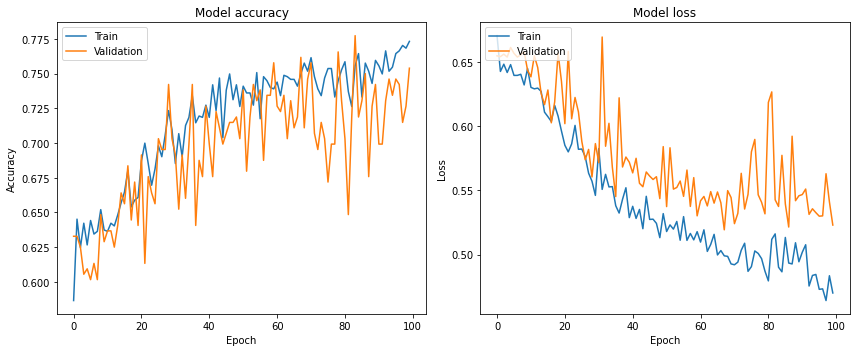

10/10 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7219
Accuracy on test set: 72.19
40/40 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7756
Accuracy on train set: 77.56


In [91]:
model = Sequential()
model.add(Dense(2**6, input_shape=(11,), activation='relu'))
model.add(Dense(2**5, activation='relu'))
model.add(Dense(2**4, activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_layers.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_layers.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of hidden layers = 3</span>

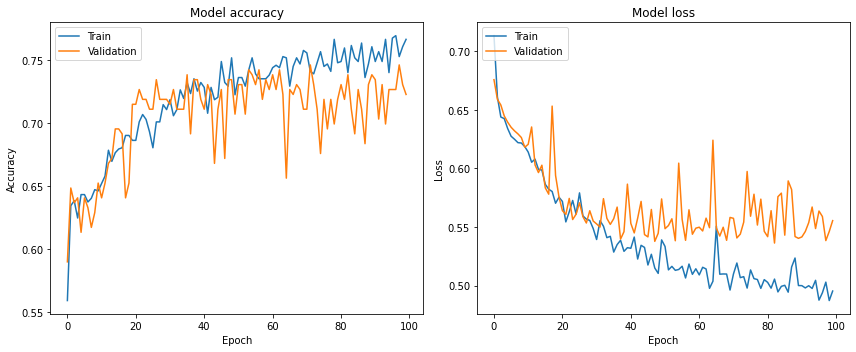

10/10 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7094
Accuracy on test set: 70.94
40/40 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7506
Accuracy on train set: 75.06


In [92]:
model = Sequential()
model.add(Dense(2**5, input_shape=(11,), activation='relu'))
model.add(Dense(2**4, activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_layers.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_layers.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of hidden layers = 2</span>

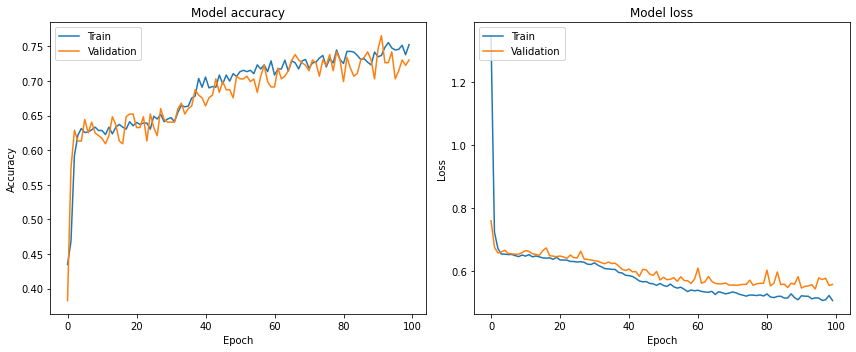

10/10 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7031
Accuracy on test set: 70.31
40/40 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7529
Accuracy on train set: 75.29


In [93]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_layers.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_layers.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of hidden layers = 1</span>

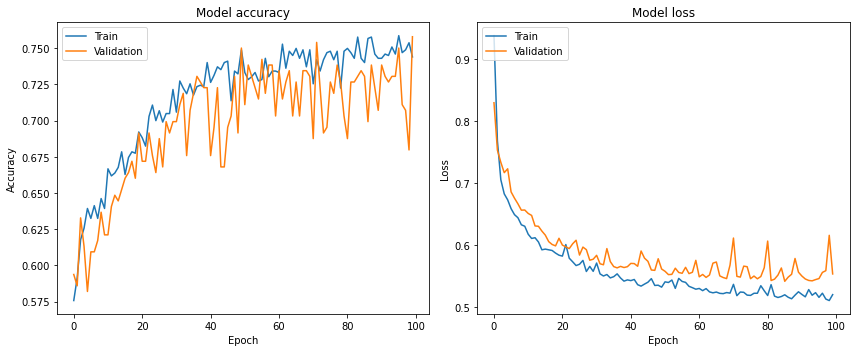

10/10 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7000
Accuracy on test set: 70.00
40/40 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7357
Accuracy on train set: 73.57


In [94]:
model = Sequential()
model.add(Dense(2**3, input_shape=(11,), activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_layers.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_layers.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of hidden layers = 0</span>

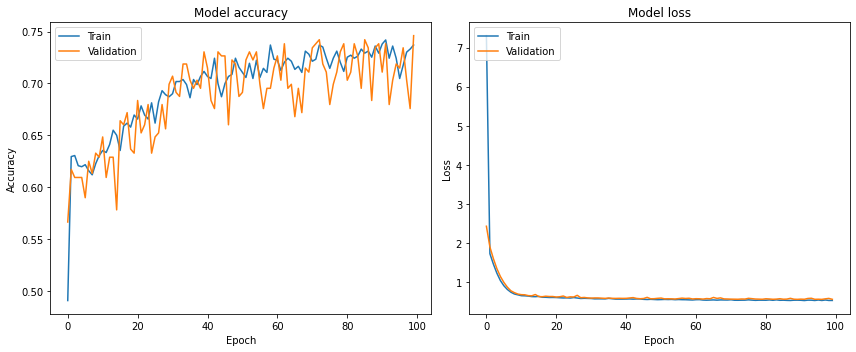

10/10 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7312
Accuracy on test set: 73.12
40/40 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7475
Accuracy on train set: 74.75


In [95]:
model = Sequential()
model.add(Dense(2**2, input_shape=(11,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_layers.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_layers.append(model.evaluate(X_train, y_train,verbose=0)[1])

In [96]:
import pandas as pd

Hiden_layers = [8, 4, 3, 2, 1, 0]

df_layers = {'Number of hidden layers': Hiden_layers,  'Accuracy-train': Acc_train_layers,'Accuracy-test': Acc_test_layers}
results_layers = pd.DataFrame(df_layers)
print(results_layers)

   Number of hidden layers  Accuracy-train  Accuracy-test
0                        8        0.534793       0.534375
1                        4        0.775606       0.721875
2                        3        0.750586       0.709375
3                        2        0.752932       0.703125
4                        1        0.735731       0.700000
5                        0        0.747459       0.731250


# <span style="color: #1BB5B7;font-size: 25pt">b) Investigating impact of neurons number on the results </span>

In [97]:
Neurons =['powers of 2','powers of 10','32,64,32,1','64,32,64,1','2^8,2^4,2^2,1']
Acc_test_neurons =[]
Acc_train_neurons = []

In [98]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30, stratify=y)

XTraining, XValidation, YTraining, YValidation = train_test_split(X_train, y_train,test_size=0.2, random_state=12, stratify=y_train)


XTraining=tf.convert_to_tensor(XTraining, dtype=tf.float32) 
XValidation=tf.convert_to_tensor(XValidation, dtype=tf.float32) 
YTraining=tf.convert_to_tensor(YTraining, dtype=tf.int32)
YValidation=tf.convert_to_tensor(YValidation, dtype=tf.int32)

## <span style="color: #8B0000;">Number of neurons - powers of 2</span>

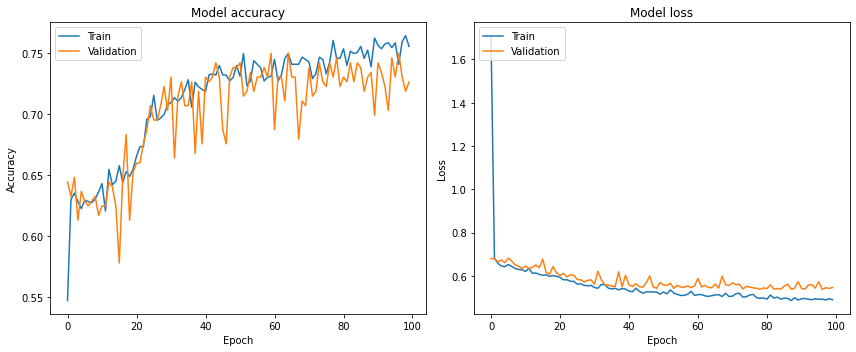

10/10 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7219
Accuracy on test set: 72.19
40/40 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7608
Accuracy on train set: 76.08


In [99]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - powers of 10</span>

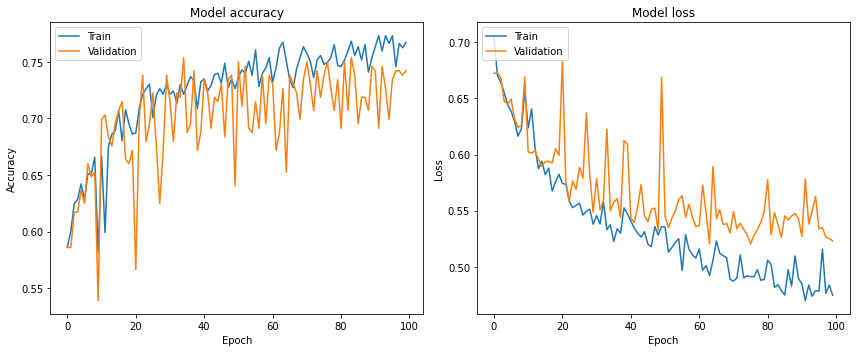

10/10 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7219
Accuracy on test set: 72.19
40/40 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7725
Accuracy on train set: 77.25


In [100]:
model = Sequential()
model.add(Dense(1000, input_shape=(11,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - 32, 64, 32, 1</span>

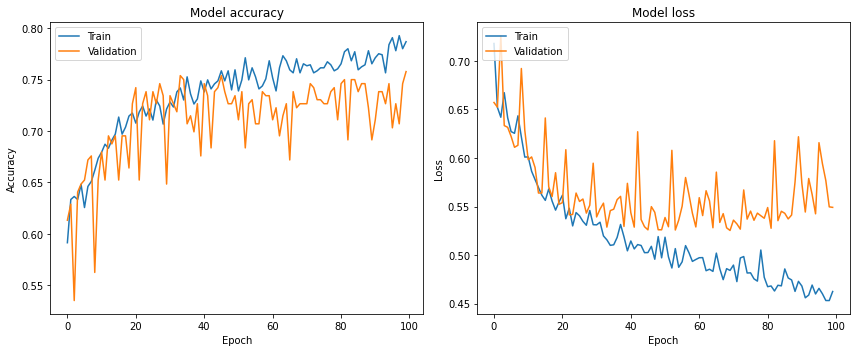

10/10 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7063
Accuracy on test set: 70.63
40/40 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7842
Accuracy on train set: 78.42


In [101]:
model = Sequential()
model.add(Dense(32, input_shape=(11,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - 64, 32, 64, 1</span>

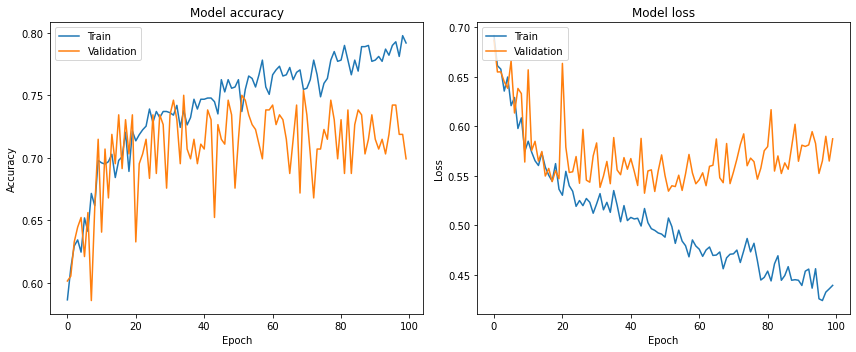

10/10 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7219
Accuracy on test set: 72.19
40/40 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7740
Accuracy on train set: 77.40


In [102]:
model = Sequential()
model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - 2^8, 2^4, 2^2, 1</span>

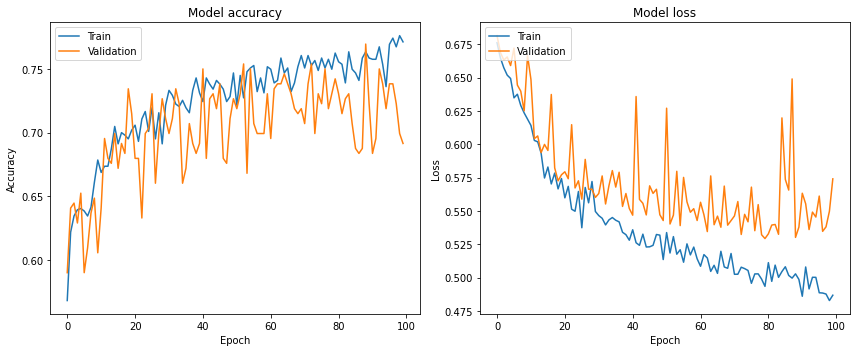

10/10 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7156
Accuracy on test set: 71.56
40/40 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7396
Accuracy on train set: 73.96


In [103]:
model = Sequential()
model.add(Dense(2**8, input_shape=(11,), activation='relu'))
model.add(Dense(2**4, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

In [104]:
df_neurons = {'Number of neurons': Neurons,  'Accuracy-train': Acc_train_neurons,'Accuracy-test': Acc_test_neurons}
results_neurons = pd.DataFrame(df_neurons)
print(results_neurons)

  Number of neurons  Accuracy-train  Accuracy-test
0       powers of 2        0.760751       0.721875
1      powers of 10        0.772479       0.721875
2        32,64,32,1        0.784206       0.706250
3        64,32,64,1        0.774042       0.721875
4     2^8,2^4,2^2,1        0.739640       0.715625


# <span style="color: #1BB5B7;font-size: 25pt">c) Investigating the impact of the optimizer on the results</span>


Adam - combines concepts from AdaGrad and RMSProp by using both the current gradient and the moving average of past gradients' squares to adjust learning rates per parameter.

RMSProp - uses an exponentially weighted moving average of squared gradients to adjust and normalize learning rates, making it effective for training deep learning models with varying gradient magnitudes.

Nadam - starts by computing the gradient of the loss function for a batch of data and then maintains moving averages for both the gradients (momentum term) and their squares (velocity term). Before the parameters are updated, the momentum term is nudged in the direction of the current gradient (this is the Nesterov trick). The parameters are then updated by taking the ratio of the Nesterov corrected first moment estimate to the square root of the second moment estimate (after adding a small constant to avoid division by zero).

Adagrad - adjusts the learning rates for each parameter based on the historical gradients, effectively scaling down the updates for frequently occurring parameters. 

SGD - updates model weights in the opposite direction of the gradient to minimize the loss function step by step.

In [105]:
Optimizer =['Adam','RMSProp','Nadam','Adagrad','SGD']
Acc_test_opt =[]
Acc_train_opt = []

In [106]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30, stratify=y)

XTraining, XValidation, YTraining, YValidation = train_test_split(X_train, y_train,test_size=0.2, random_state=12, stratify=y_train)


XTraining=tf.convert_to_tensor(XTraining, dtype=tf.float32) 
XValidation=tf.convert_to_tensor(XValidation, dtype=tf.float32) 
YTraining=tf.convert_to_tensor(YTraining, dtype=tf.int32)
YValidation=tf.convert_to_tensor(YValidation, dtype=tf.int32)

## <span style="color: #8B0000;">optimizer = ADAM</span>

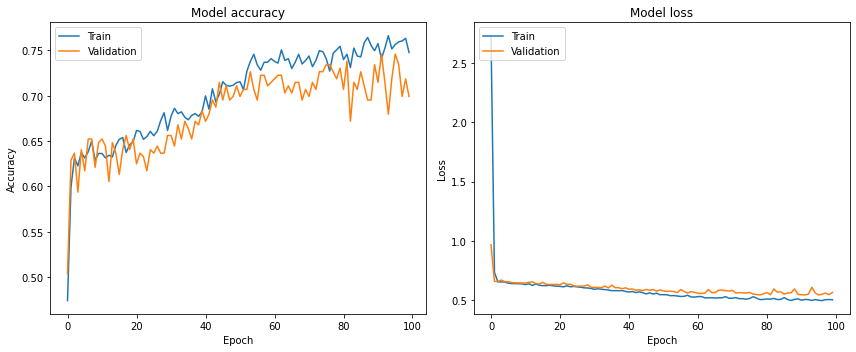

10/10 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7000
Accuracy on test set: 70.00
40/40 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7475
Accuracy on train set: 74.75


In [107]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">optimizer = RMSProp</span>

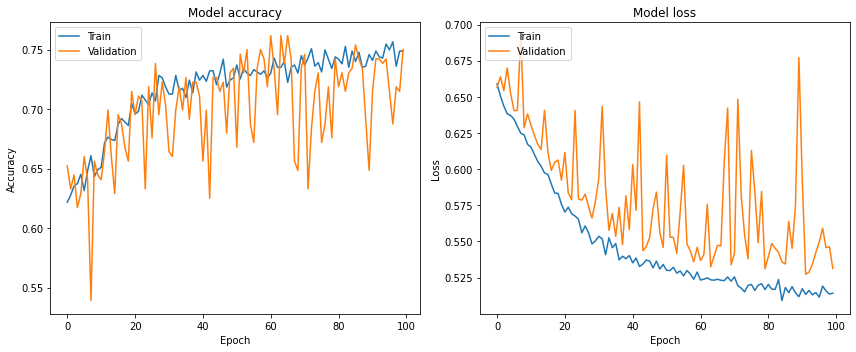

10/10 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7125
Accuracy on test set: 71.25
40/40 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.7568
Accuracy on train set: 75.68


In [108]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">optimizer = NADAM</span>

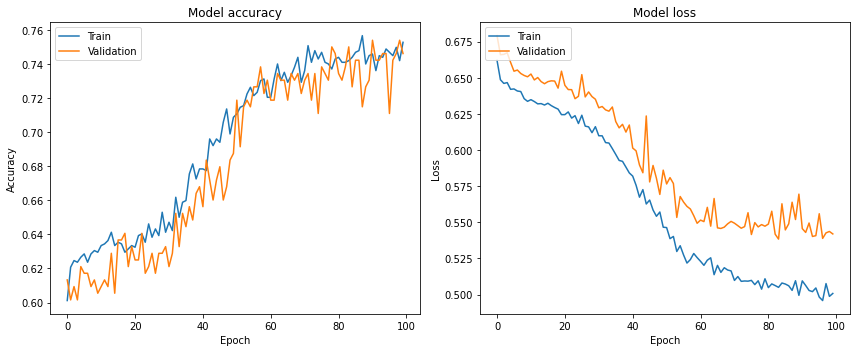

10/10 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7188
Accuracy on test set: 71.88
40/40 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7584
Accuracy on train set: 75.84


In [109]:
from tensorflow.keras.optimizers import Nadam
optimizer = Nadam()
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">optimizer = ADAGRAD</span>

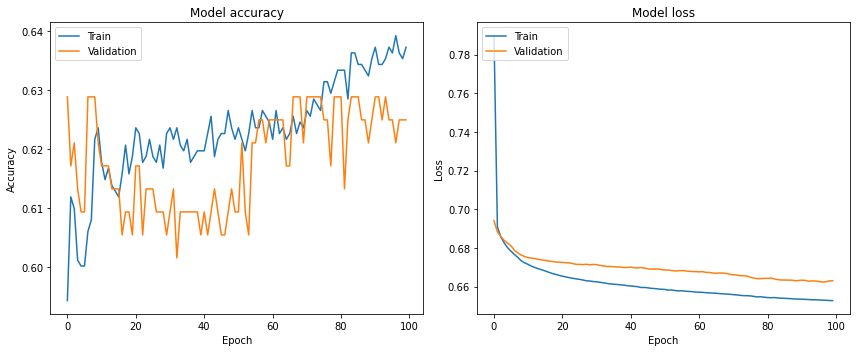

10/10 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6438
Accuracy on test set: 64.38
40/40 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6341
Accuracy on train set: 63.41


In [110]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">optimizer = SGD (Stochastic Gradient Descent)</span>

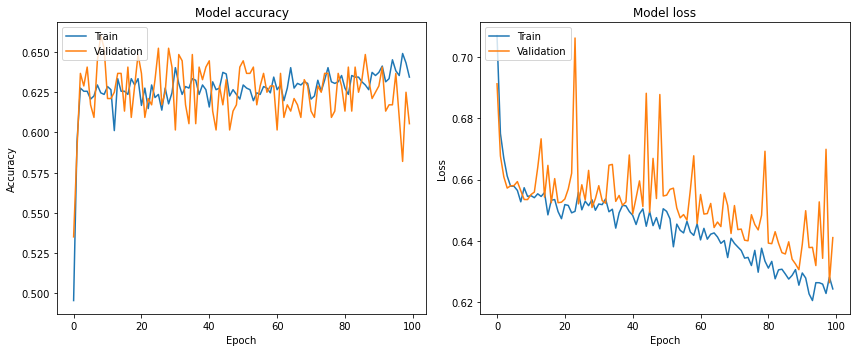

10/10 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6250
Accuracy on test set: 62.50
40/40 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6247
Accuracy on train set: 62.47


In [111]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])

In [112]:
Optimizer =['Adam','RMSProp','Nadam','Adagrad','SGD']
df_opt = {'Optimizer': Optimizer,  'Accuracy-train': Acc_train_opt,'Accuracy-test': Acc_test_opt}
results_opt = pd.DataFrame(df_opt)
print(results_opt)

  Optimizer  Accuracy-train  Accuracy-test
0      Adam        0.747459        0.70000
1   RMSProp        0.756841        0.71250
2     Nadam        0.758405        0.71875
3   Adagrad        0.634089        0.64375
4       SGD        0.624707        0.62500


# <span style="color: #1BB5B7;font-size: 25pt">d) Investigating impact of activation function on the results</span>


ReLU
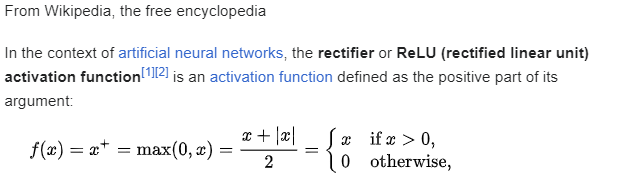

Tanh
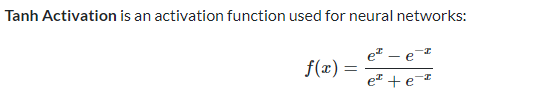

Sigmoid
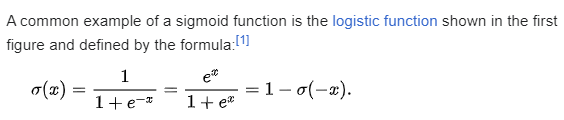

Softplus
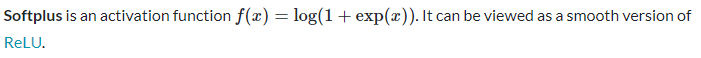

In [125]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30, stratify=y)

XTraining, XValidation, YTraining, YValidation = train_test_split(X_train, y_train,test_size=0.2, random_state=12, stratify=y_train)


XTraining=tf.convert_to_tensor(XTraining, dtype=tf.float32) 
XValidation=tf.convert_to_tensor(XValidation, dtype=tf.float32) 
YTraining=tf.convert_to_tensor(YTraining, dtype=tf.int32)
YValidation=tf.convert_to_tensor(YValidation, dtype=tf.int32)

Sigmoid function on the last layer and relu on the rest.


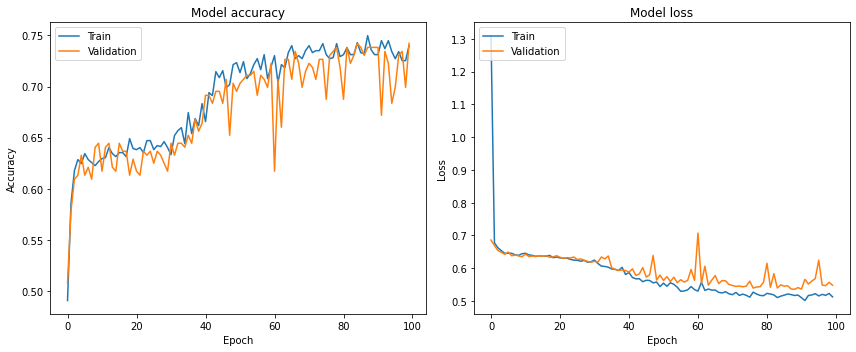

10/10 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7250
Accuracy on test set: 72.50
40/40 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7435
Accuracy on train set: 74.35
........................................................................

Sigmoid function on the last layer and tanh on the rest.


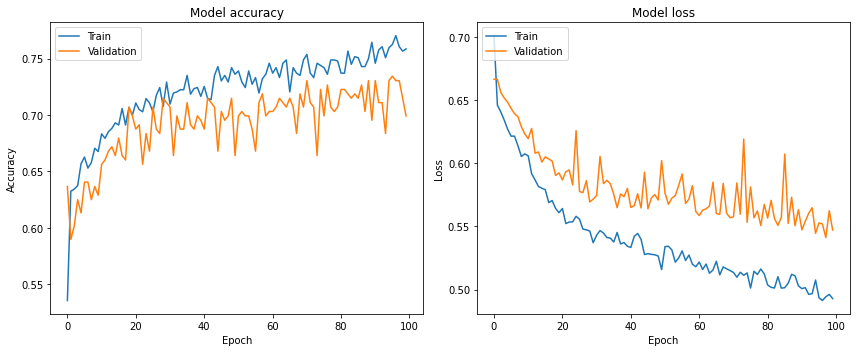

10/10 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7000
Accuracy on test set: 70.00
40/40 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7467
Accuracy on train set: 74.67
........................................................................

Sigmoid function on the last layer and sigmoid on the rest.


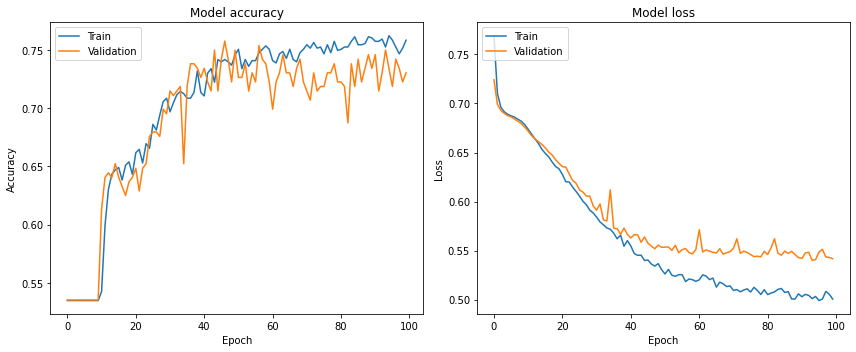

10/10 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7312
Accuracy on test set: 73.12
40/40 [==============================] - 0s 1ms/step - loss: 0.5047 - accuracy: 0.7545
Accuracy on train set: 75.45
........................................................................

Sigmoid function on the last layer and softplus on the rest.


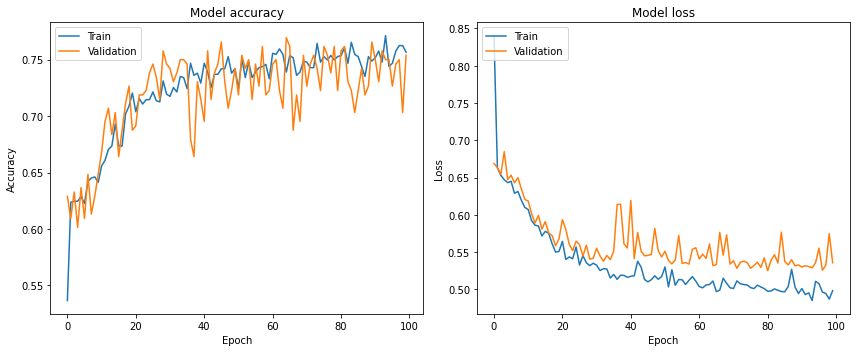

10/10 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7344
Accuracy on test set: 73.44
40/40 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7615
Accuracy on train set: 76.15
........................................................................

  Activation  Accuracy-train  Accuracy-test
0       relu        0.743550       0.725000
1       tanh        0.746677       0.700000
2    sigmoid        0.754496       0.731250
3   softplus        0.761532       0.734375


In [120]:
activations = ['relu', 'tanh', 'sigmoid','softplus']
Acc_test_activ = []
Acc_train_activ = []

for activation in activations:
    model = Sequential()
    model.add(Dense(2**4, input_shape=(11,), activation=activation))
    model.add(Dense(2**3, activation=activation))
    model.add(Dense(2**2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(XTraining, YTraining, epochs=100, batch_size=10, validation_data=(XValidation, YValidation), verbose=0)  
    print("Sigmoid function on the last layer and {} on the rest.".format(activation))
    test_model(model, X_test, y_test, history, X_train, y_train)
    print('........................................................................')
    print('')
    Acc_test_activ.append(model.evaluate(X_test, y_test, verbose=0)[1])
    Acc_train_activ.append(model.evaluate(X_train, y_train, verbose=0)[1])

df_activ = {
    'Activation': activations,
    'Accuracy-train': Acc_train_activ,
    'Accuracy-test': Acc_test_activ
}

results_activ = pd.DataFrame(df_activ)
print(results_activ)

# Other interesting combinations of activation functions

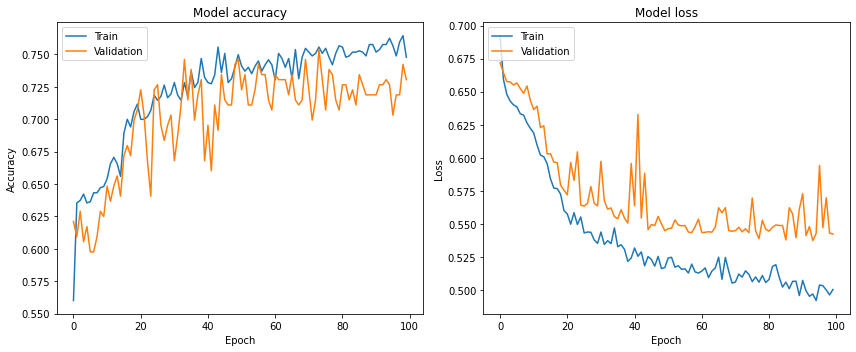

10/10 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7406
Accuracy on test set: 74.06
40/40 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7654
Accuracy on train set: 76.54


In [121]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='sigmoid'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])

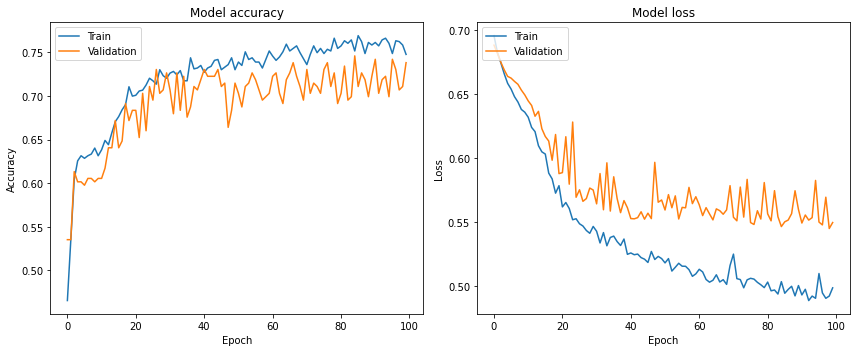

10/10 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.6969
Accuracy on test set: 69.69
40/40 [==============================] - 0s 1ms/step - loss: 0.4976 - accuracy: 0.7545
Accuracy on train set: 75.45


In [122]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='sigmoid'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])

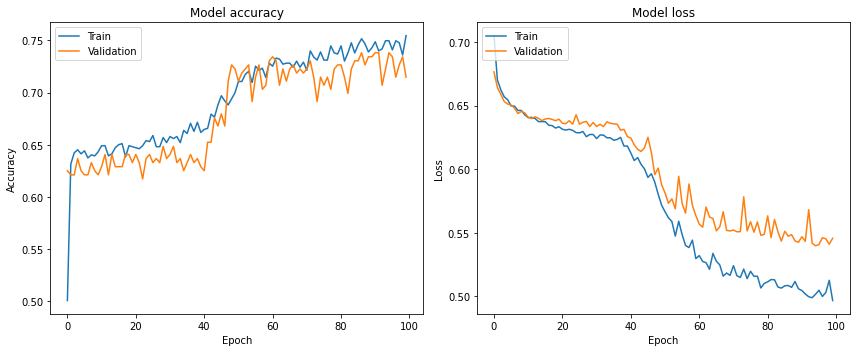

10/10 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7156
Accuracy on test set: 71.56
40/40 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7389
Accuracy on train set: 73.89


In [123]:
model = Sequential()
model.add(Dense(2**4, input_shape=(11,), activation='tanh'))
model.add(Dense(2**3, activation='softplus'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(XTraining,YTraining, epochs=100, batch_size=10, validation_data=(XValidation,YValidation),verbose=0)  

test_model(model, X_test, y_test, history, X_train, y_train)
Acc_test_opt.append(model.evaluate(X_test, y_test,verbose=0)[1])
Acc_train_opt.append(model.evaluate(X_train, y_train,verbose=0)[1])